# Classify image as cat vs non-cat using logistic regression

### import packages need for image-recognition

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

### load the dataset from system

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

AxesImage(54,36;334.8x217.44)
(50, 64, 64, 3)


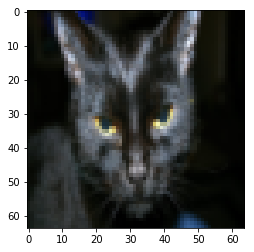

In [3]:
#view the dataset
c = 25
cat = train_set_x_orig[c]
print(plt.imshow(cat))
print(test_set_x_orig.shape)

AxesImage(54,36;334.8x217.44)


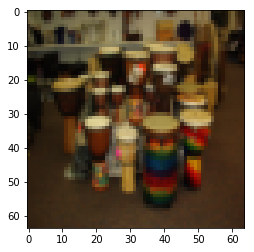

In [4]:
nc = 5
non_cat = train_set_x_orig[nc]
print(plt.imshow(non_cat))

In [1]:
#Human level performance
n = 1
print(plt.imshow(test_set_x_orig[n,:]))

NameError: name 'plt' is not defined

In [5]:
#unroll the data from 64,64, 3 to (64 * 64 * 3), 1
X_train = train_set_x_orig.reshape(209,64 * 64 * 3)
X_train = X_train.T
X_train = X_train / (np.max(X_train, axis = 0))
Y_train = train_set_y
X_test  = test_set_x_orig.reshape(50,64*64*3)
X_test  = X_test.T
X_test  = X_test / (np.max(X_test, axis = 0))
Y_test  = test_set_y
print(X_train.shape,Y_train.shape)

m = 209
tf.reset_default_graph()

(12288, 209) (1, 209)


#### create the place holder for input and output

In [7]:
X = tf.placeholder(tf.float32,shape = [12288,209], name = 'Input')
Y = tf.placeholder(tf.float32, shape = [1,209], name = 'Output')

W = tf.Variable(tf.random_uniform([12288,1], maxval = .0001, seed = 1 ), tf.float32, name = 'Weight')
b = tf.Variable(tf.random_uniform([1,1], maxval = .0001, seed = 1), tf.float32, name = 'bias')

#model of perceptron
Y_predict = tf.sigmoid(tf.matmul(tf.transpose(W), X) + b, name = 'Y_predict')

#### find cost function and derivative dw  and db

In [74]:
iteration = 1500
learning_rate = tf.constant(0.003,name = 'learning_rate')
iteration_cost =[];

cost =tf.reduce_sum(Y * tf.log(Y_predict) + (1 - Y) * tf.log(1 - Y_predict)) * (-1) 


error = tf.subtract(Y, Y_predict, name = 'Error')

dw = tf.matmul(X, tf.transpose(error)) / (m)
db = tf.reduce_sum(error, keep_dims = True) / (m)

assign_w = W.assign_add(learning_rate * dw)
assign_b = b.assign_add(learning_rate * db)

#### Train our model

In [75]:
with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    
    for i in range(iteration):
        sess.run([assign_w, assign_b], {X:X_train, Y:Y_train})
        iteration_cost.append(sess.run(cost, {X:X_train, Y:Y_train}))
    w_test = W.eval()
    b_test = b.eval()

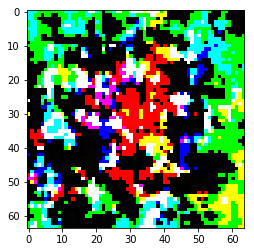

In [77]:
#visualize the value of W, it most look like cat
w_int = [int(i*200) for i in w_test]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

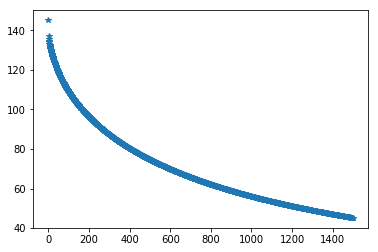

In [78]:
#plot the cost function over iteration
plt.plot(iteration_cost,'*')

In [79]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

a = np.array([-1, -0.5, 0, 0.5, 1])
sigmoid(a)

array([ 0.26894142,  0.37754067,  0.5       ,  0.62245933,  0.73105858])

In [80]:
#Train accuracy
correct_no_train = 0
total_no_train = 0
for i in range(209):
    y = sigmoid(np.dot(w_test.T, X_train[:,i]) + b_test)
    
    if (np.abs(y - Y_train[:,i]) < 0.5):
        correct_no_train += 1
    
    total_no_train += 1

print(correct_no_train / total_no_train)

0.9712918660287081


In [81]:
#Test accuracy
correct_no_test = 0
total_no_test = 0
for i in range(50):
    y = sigmoid(np.dot(w_test.T, X_test[:,i]) + b_test)
    
    if (np.abs(y - Y_test[:,i]) < 0.5):
        correct_no_test += 1
    
    total_no_test += 1

print(correct_no_test / total_no_test)

0.74


In [82]:
print('Training accuracy ' + str(correct_no_train / total_no_train)+ ' ' + 'Testing accuracy ' + str(correct_no_test / total_no_test)+ '.')

Training accuracy 0.9712918660287081 Testing accuracy 0.74.


### Conclusion 


#### Train accuracy does not converge to testing accuarcy  either because of High bias or High varience.
#### High varience, many parameter but small no of training data set. (Overfitting) 
#### This can be solve collect more data or regularization.